<a href="https://colab.research.google.com/github/angel442002/repositorio_tareas/blob/main/Copia_de_6_Practica_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/exercises/6_Practica_WS.ipynb)

# Análisis Comparativo del Índice de Calidad de Vida: México vs Países Mejor Clasificados

En este ejercicio realizamos una extracción automatizada de datos (web scraping) desde el portal **[Numbeo](https://www.numbeo.com/quality-of-life/rankings_by_country.jsp)**, una de las bases de datos más confiables del mundo en cuanto a estadísticas de calidad de vida a nivel internacional. A partir de esta información, se construye un análisis comparativo entre **México** y los países mejor posicionados en los últimos años.

| **Índice**                            | **Descripción** |
|----------------------------------------|----------------|
| **Rank**                               | Posición del país en el ranking general de calidad de vida. |
| **Country**                            | Nombre del país analizado. |
| **Quality of Life Index**              | Índice general de calidad de vida (ponderación de varios factores). |
| **Purchasing Power Index**             | Capacidad adquisitiva de los ciudadanos en relación con el costo de vida. |
| **Safety Index**                        | Nivel de seguridad y criminalidad en el país. |
| **Health Care Index**                   | Calidad y acceso a los servicios de salud. |
| **Cost of Living Index**                | Comparación del costo de vida con respecto a otros países. |
| **Property Price to Income Ratio**      | Relación entre el precio de la vivienda y el ingreso promedio. |
| **Traffic Commute Time Index**          | Tiempo promedio de desplazamiento en el tráfico. |
| **Pollution Index**                     | Niveles de contaminación ambiental en el país. |
| **Climate Index**                       | Evaluación del clima y condiciones meteorológicas en la región. |
| **Year**                                | Año en que se recopilaron los datos. |

---

## Objetivo General

Comparar el desempeño de **México** frente al **Top 5 de países mejor rankeados** en el **Índice de Calidad de Vida (Quality of Life Index)** durante los últimos años, utilizando visualizaciones que nos permitan detectar patrones, brechas y oportunidades de mejora.

---

## Metodología

###. **Extracción de Datos**

Utilizamos la librería `requests` para conectarnos con la página de Numbeo, donde se publican rankings semestrales (primera mitad y segunda mitad del año) de calidad de vida por país.  
Los datos extraídos se procesan con `BeautifulSoup` y se almacenan en una estructura tipo tabla usando `pandas`.
A lo largo del ejercicio, aplicarás conceptos fundamentales como:  
✔️ **Web Scraping con `requests` y `BeautifulSoup`**  
✔️ **Manipulación y limpieza de datos con `pandas`**  
✔️ **Análisis Exploratorio de Datos (EDA)**  
✔️ **Generación y exportación de datos estructurados en `CSV`**  


### 2. **Transformación y Preparación**

- Convertimos los datos extraídos a tipos adecuados (`float`, `int`, `str`) para su análisis.
- Filtramos los registros para separar dos subconjuntos clave:
  -  **México**
  -  **Top 5 de países** por cada año.
- Creamos un nuevo DataFrame comparativo uniendo ambos conjuntos.

---

##  Análisis Visual

###  1. Gráfico de Dispersión (Scatterplot)

Se muestra cómo evoluciona el Índice de Calidad de Vida en el tiempo, diferenciando a México con un marcador especial y comparándolo con los países top 5 de cada año. Esta visualización permite ver si la brecha se ha ampliado, reducido o mantenido estable.

###  2. Gráfico de Barras por Año más Reciente

Mostramos los valores del índice para **el año más reciente disponible** (por ejemplo, 2025), y comparamos directamente el valor de México con los países del Top 5 en ese mismo periodo. Esto ofrece una vista instantánea del lugar que ocupa México en el ranking actual.

---

##  Indicadores Analizados

- **Quality of Life Index:** Índice general compuesto por varios factores como poder adquisitivo, salud, seguridad, contaminación y más. A mayor valor, mayor calidad de vida estimada.

---

##  Conclusión Esperada

Este ejercicio no solo permite evaluar el lugar de México en el contexto global, sino también observar **qué países mantienen una calidad de vida elevada de forma consistente**, y **cómo ha sido el desempeño histórico de México** frente a estos referentes.

---

> Esta metodología puede replicarse fácilmente para otros índices específicos, como:
> - 🏥 Health Care Index  
> - 🛡️ Safety Index  
> - 💸 Purchasing Power Index  
> - 🌫️ Pollution Index  
> - 🌤️ Climate Index



In [25]:
# Importamos las librerías necesarias
import requests  # Para hacer solicitudes HTTP y obtener datos de la web
from bs4 import BeautifulSoup  # Para analizar HTML y extraer información
import pandas as pd  # Para manipulación de datos en tablas
from datetime import datetime  # Para trabajar con fechas y tiempos
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos el encabezado 'User-Agent' para evitar bloqueos por parte de la página web
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# 🔹 Determinamos el rango de años a analizar
current_year = datetime.now().year  # Obtiene el año actual
starting_year = current_year - 10  # Calcula el primer año (últimos 10 años)

# Creamos una lista vacía para almacenar la información extraída
data = []

# 🔹 Iteramos sobre los últimos 10 años, analizando cada uno
for year in range(starting_year, starting_year + 20):
    for half in ["", "-mid"]:  # "" para el primer semestre, "-mid" para el segundo semestre
        formatted_year = f"{year}{half}"  # Formateamos el año correctamente para el URL

        # Evita analizar el segundo semestre del año actual, ya que puede no tener datos aún
        if formatted_year == (str(current_year) + 'mid'):
            continue

        # Construimos la URL del sitio web de Numbeo
        url = f"https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title={formatted_year}"

        # Hacemos la solicitud HTTP al sitio web
        response = requests.get(url, headers = HEADERS)

        # Si la respuesta es incorrecta, genera un error para detener el programa
        response.raise_for_status()

        # Parseamos el contenido HTML usando BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Buscamos la tabla que contiene los datos
        table = soup.find('tbody')
        if not table:  # Si no hay tabla, pasamos al siguiente año
            continue

        # Definimos los nombres de las columnas que tendrán nuestros datos
        headers = ["Rank", "Country", "Quality of Life Index", "Purchasing Power Index", "Safety Index", "Health Care Index", "Cost of Living Index", "Property Price to Income Ratio", "Traffic Commute Time Index", "Pollution Index", "Climate Index","Year"]
        rank = 1  # Inicializamos el ranking para cada año

        # 🔹 Extraemos los datos fila por fila
        for row in table.find_all('tr'):
            columns = row.find_all('td')

            # Si la primera columna está vacía, asignamos manualmente el ranking
            if columns and columns[0].text.strip() == "":
                rank_value = rank  # Asignamos el ranking manualmente
                columns = columns[1:]  # Eliminamos la primera celda vacía
            else:
                rank_value = rank  # Usamos el ranking normal

            # Verificamos que la cantidad de columnas sea correcta antes de procesarlas
            if len(columns) == len(headers) - 2:  # -2 porque agregamos Rank y Year manualmente
                row_data = [rank_value] + [col.text.strip() for col in columns]  # Extraemos y limpiamos los datos

                # 🔹 Ajustamos el formato del año
                if half == "-mid":
                    row_data.append(f"{year}/2")  # Convertimos "2015-mid" en "2015/2"
                else:
                    row_data.append(str(year))  # Mantenemos el año normal

                # Guardamos la fila en la lista de datos
                data.append(row_data)
                rank += 1  # Incrementamos el ranking

# 🔹 Convertimos la lista en un DataFrame de Pandas
df = pd.DataFrame(data,columns=headers)

# 🔹 Guardamos el DataFrame en un archivo CSV
df.to_csv("data_quality_of_life.csv", index=False)

# 🔹
df

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1578,84,Egypt,85.3,21.4,52.7,47.3,19.0,18.2,48.0,82.7,92.0,2025
1579,85,Sri Lanka,81.1,18.5,57.9,71.4,33.5,34.2,54.5,57.9,59.1,2025
1580,86,Venezuela,79.7,16.0,19.3,38.7,35.9,15.1,32.8,75.1,99.9,2025
1581,87,Bangladesh,73.9,35.9,38.4,42.2,20.9,12.8,57.1,85.4,71.3,2025


In [26]:
# Asegurarnos de que las columnas necesarias estén en el tipo correcto
df["Year"] = df["Year"].astype(str)
df["Rank"]= pd.to_numeric(df["Rank"], errors="coerce")
df["Quality of Life Index"] = pd.to_numeric(df["Quality of Life Index"],errors="coerce")

# Crear DataFrame de México
df_mexico = df[df["Country"]=="Mexico"].copy()

# Obtener el top 5 de cada año
dftop5=df.groupby("Year").apply(lambda x: x.nsmallest(5,"Rank")).reset_index(drop=True)
dftop5

<ipython-input-26-276dcfbfd07b>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dftop5=df.groupby("Year").apply(lambda x: x.nsmallest(5,"Rank")).reset_index(drop=True)


,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,Luxembourg,220.1,184.3,65.8,75.2,64.8,8.6,27.0,23.3,82.6,2025
101,2,Netherlands,211.3,134.5,73.1,79.3,60.5,7.7,23.5,21.6,87.2,2025
102,3,Denmark,209.9,137.3,74.0,78.4,66.9,6.5,27.8,20.6,82.5,2025
103,4,Oman,208.9,153.8,81.7,65.1,39.8,3.1,22.1,35.6,67.2,2025


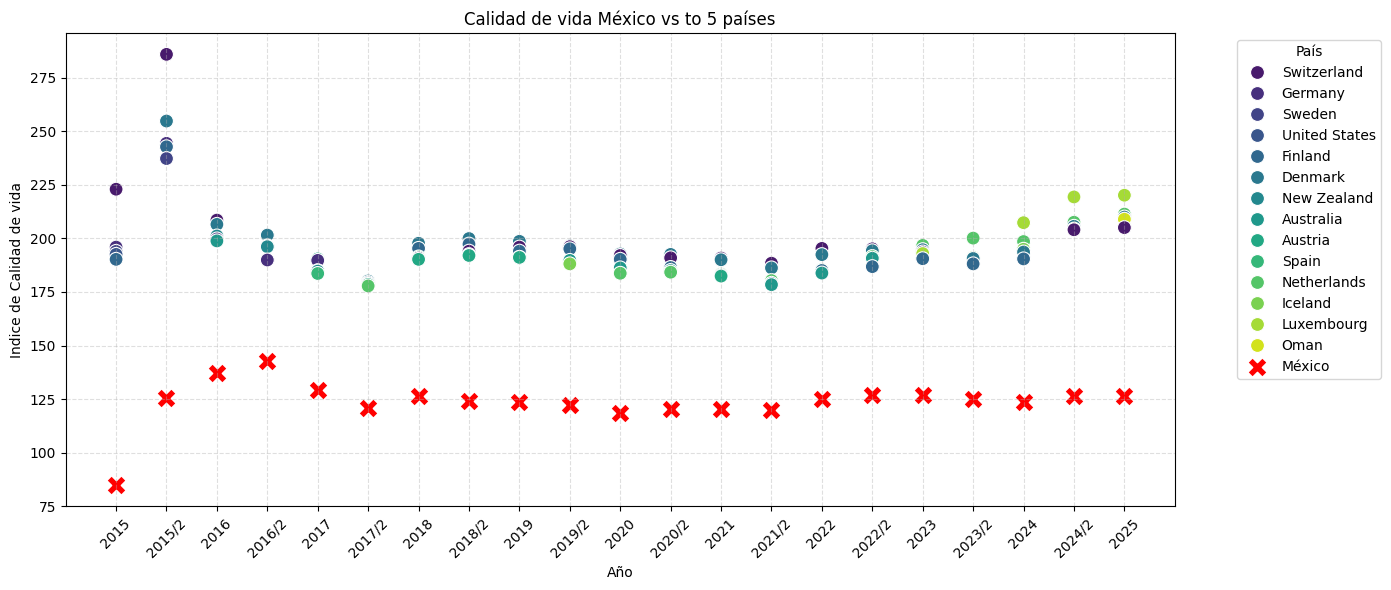

In [27]:
# Gráfico de dispersión (scatterplot) para México vs Top 5 en el tiempo
plt.figure(figsize=(14, 6))
sns.scatterplot(data=dftop5,x='Year', y='Quality of Life Index',hue='Country', palette='viridis', s=100 )
sns.scatterplot(data=df_mexico,x='Year', y='Quality of Life Index', color='red', s=200, label='México', marker='X')

plt.title('Calidad de vida México vs to 5 países')
plt.xlabel('Año')
plt.ylabel('Indice de Calidad de vida')
plt.xticks(rotation=45)
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

<ipython-input-28-988dff3ee450>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Quality of Life Index", y="Country", data=df_2025_sorted, palette=["#1f77b4" if country != "Mexico" else "#d62728" for country in df_2025_sorted["Country"]])


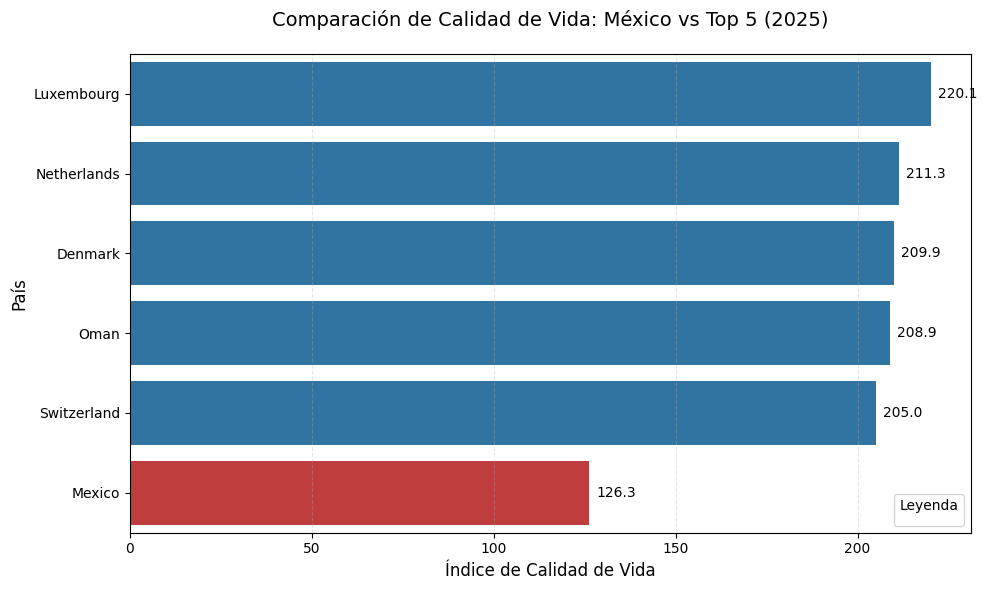

In [28]:
# Unir México con el top 5
df_comparacion_mexico_top5 = pd.concat([dftop5,df_mexico]).sort_values(['Year','Rank'])

# Comparación directa para el año más reciente (2025 o el más alto disponible)
latest_year = df_comparacion_mexico_top5['Year'].max()
df_2025=df_comparacion_mexico_top5[df_comparacion_mexico_top5['Year'] == latest_year]
# Ordenar por ICV
df_2025_sorted = df_2025.sort_values("Quality of Life Index", ascending=False)

# Gráfico de comparación para el año más reciente
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Quality of Life Index", y="Country", data=df_2025_sorted, palette=["#1f77b4" if country != "Mexico" else "#d62728" for country in df_2025_sorted["Country"]])

plt.title(f"Comparación de Calidad de Vida: México vs Top 5 ({latest_year})", fontsize=14, pad=20)
plt.xlabel("Índice de Calidad de Vida", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='x')

for i, value in enumerate(df_2025_sorted["Quality of Life Index"]): barplot.text(value + 2, i, f"{value:.1f}", ha='left', va='center', fontsize=10)

handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, labels, title="Leyenda")

plt.tight_layout()
plt.show()